# Import libraries and Data

In [187]:
# imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [188]:
#  Define current path and data path
current_path = os.path.dirname(os.path.abspath('__file__')) 
data_path = os.path.join(current_path, 'Data\diabetes_binary_health_indicators_BRFSS2015.csv')
# import data into dataframe
diabetes_health_indicators_data = pd.read_csv(data_path)

# Helper Functions

## General

In [189]:
def separate_column_names_by_binary_and_nonbinary(df):
    """
    This function returns binary column name and non-binary column name based on describe method's min and max value.
    """
    binary_column_names = []
    nonbinary_column_names = []
    for column_name in df.columns:
        if df[column_name].describe().loc['min'] == 0 and df[column_name].describe().loc['max'] == 1:
            binary_column_names.append(column_name)
        else:
            nonbinary_column_names.append(column_name)
    return binary_column_names, nonbinary_column_names

## Plotting

In [190]:
def create_stacked_count_plot_for_categorical_variables(df, column_name, grouped_variable, title):
    """
    This function creates a stacked count plot for categorical variables.
    """
    color = ['blue', 'red']
    df.groupby([column_name, grouped_variable]).size().unstack().plot(kind='bar', stacked=True, color=color, figsize=(10, 10))
    plt.title(title)
    plt.show()

In [191]:
def create_count_plot_for_categorical_variables(df, column_name, title):
    """
    This function creates count plot for categorical variables.
    """
    plt.figure(figsize=(10, 10))
    sns.countplot(x=column_name, data=df)
    plt.title(title)
    plt.show()

In [192]:
def create_pi_chart_for_categorical_variables(df, column_name, title):
    """
    This function creates pi chart for categorical variables.
    """
    plt.figure(figsize=(10, 10))
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(title)
    plt.show()

In [193]:
def create_heat_map(df, title):
    """
    This function creates heat map for categorical variables.
    """
    plt.figure(figsize=(10, 10))
    sns.heatmap(df.corr(), annot=True)
    plt.title(title)
    plt.show()

In [242]:
def create_histogram(df, column_name, title, bins):
    """
    This function creates histogram for continuous variables.
    """
    plt.figure(figsize=(10, 10))
    sns.distplot(df[column_name], kde=True, bins=bins)
    plt.title(title)
    plt.show()

# Exploratory Data Analysis (EDA)

## View Data

In [194]:
# view data
print("Data Preview")
display(diabetes_health_indicators_data.iloc[:,0:20].head())
display(diabetes_health_indicators_data.iloc[:,20:].head())
# check for column names
print("\nColumn Preview")
display(diabetes_health_indicators_data.columns.to_frame().reset_index(drop=True).rename(columns={0:'column_name'}))

Data Preview


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


,Education,Income
0,4.0,3.0
1,6.0,1.0
2,4.0,8.0
3,3.0,6.0
4,5.0,4.0



Column Preview


,column_name
0,Diabetes_binary
1,HighBP
2,HighChol
3,CholCheck
4,BMI
5,Smoker
6,Stroke
7,HeartDiseaseorAttack
8,PhysActivity
9,Fruits


## Check for Missing Values

In [195]:
# check for missing values
print("\nMissing Values")
display(diabetes_health_indicators_data.isnull().sum().to_frame().reset_index(drop=False).rename(columns={'index':'column_name', 0:'missing_values'}))


Missing Values


,column_name,missing_values
0,Diabetes_binary,0
1,HighBP,0
2,HighChol,0
3,CholCheck,0
4,BMI,0
5,Smoker,0
6,Stroke,0
7,HeartDiseaseorAttack,0
8,PhysActivity,0
9,Fruits,0


## Column Specific Statistics

In [196]:
#binary variables filter
diabetes_health_indicators_data_binary_columns, diabetes_health_indicators_data_non_binary_columns = separate_column_names_by_binary_and_nonbinary(diabetes_health_indicators_data)
print("\nBinary Columns")
display(diabetes_health_indicators_data_binary_columns)
print('number of binary columns: ', len(diabetes_health_indicators_data_binary_columns))
print("\nNon-Binary Columns")
display(diabetes_health_indicators_data_non_binary_columns)
print('number of non-binary columns: ', len(diabetes_health_indicators_data_non_binary_columns))


Binary Columns


['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

number of binary columns:  15

Non-Binary Columns


['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

number of non-binary columns:  7


In [197]:
#  summary of data
print("Summary of data")
print("Summary of data for non-binary columns")
display(diabetes_health_indicators_data[diabetes_health_indicators_data_non_binary_columns].describe())
print("Summary of data for binary columns")
# change binary columns to object type
diabetes_health_indicators_data_object_type = diabetes_health_indicators_data[diabetes_health_indicators_data_binary_columns].astype('object')
display(diabetes_health_indicators_data_object_type.describe())

Summary of data
Summary of data for non-binary columns


,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


Summary of data for binary columns


,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
count,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
freq,218334.0,144851.0,146089.0,244210.0,141257.0,243388.0,229787.0,191920.0,160898.0,205841.0,239424.0,241263.0,232326.0,211005.0,141974.0


## Variable Importance

#### Import Libraries

In [198]:
# feature significance test libraries
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Categorical Variables - Chi-Square Test

#### Chi-Square Test Code

In [199]:
#  chi2 test on binary columns
chi2_test = SelectKBest(score_func=chi2, k='all')
chi2_test.fit(diabetes_health_indicators_data[diabetes_health_indicators_data_binary_columns].drop('Diabetes_binary', axis=1), diabetes_health_indicators_data['Diabetes_binary'])


SelectKBest(k='all', score_func=<function chi2 at 0x0000021A15B1DDC0>)

#### Chi-Square Test Results

In [200]:
# create dataframe for chi2 test scores
chi2_test_scores = pd.DataFrame(chi2_test.scores_, columns=['chi2_score'])
chi2_test_scores['column_name'] = diabetes_health_indicators_data_binary_columns[1:]
# swap column names and chi2 scores
chi2_test_scores = chi2_test_scores[['column_name', 'chi2_score']]
chi2_test_scores = chi2_test_scores.sort_values(by='chi2_score', ascending=False).reset_index(drop=True)
print("Chi2 Test Scores")
display(chi2_test_scores)

#  create dataframe for chi2 test p-values
chi2_test_p_values = pd.DataFrame(chi2_test.pvalues_, columns=['chi2_p_value'])
chi2_test_p_values['column_name'] = diabetes_health_indicators_data_binary_columns[1:]
# swap column names and chi2 scores
chi2_test_p_values = chi2_test_p_values[['column_name', 'chi2_p_value']]
chi2_test_p_values = chi2_test_p_values.sort_values(by='chi2_p_value', ascending=True).reset_index(drop=True)
print("Chi2 Test P-Values")
display(chi2_test_p_values)

Chi2 Test Scores


,column_name,chi2_score
0,DiffWalk,10059.506391
1,HighBP,10029.013935
2,HeartDiseaseorAttack,7221.975378
3,HighChol,5859.710582
4,Stroke,2725.225194
5,PhysActivity,861.887532
6,HvyAlcoholConsump,779.424807
7,Smoker,521.978858
8,NoDocbcCost,229.542412
9,Fruits,154.291404


Chi2 Test P-Values


,column_name,chi2_p_value
0,HighBP,0.000000e+00
1,HighChol,0.000000e+00
2,Stroke,0.000000e+00
3,HeartDiseaseorAttack,0.000000e+00
4,DiffWalk,0.000000e+00
5,PhysActivity,1.893271e-189
6,HvyAlcoholConsump,1.605281e-171
7,Smoker,1.570423e-115
8,NoDocbcCost,7.501278e-52
9,Fruits,2.000073e-35


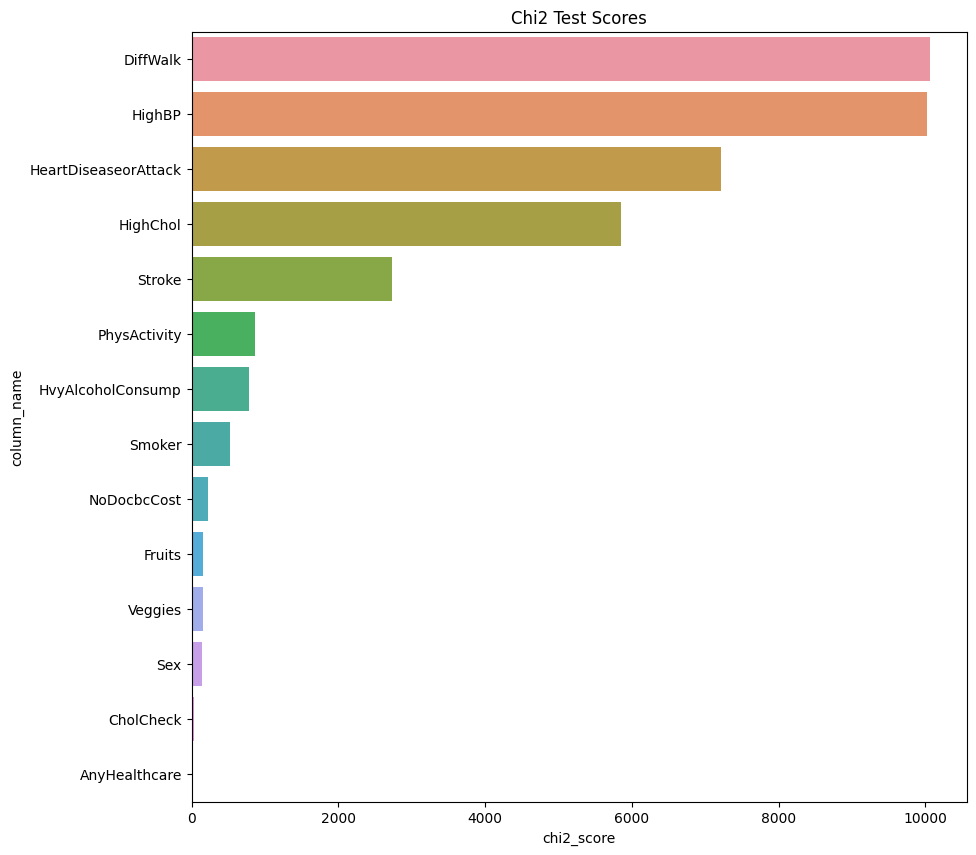

In [201]:
# plot chi2 test scores
plt.figure(figsize=(10,10))
sns.barplot(x='chi2_score', y='column_name', data=chi2_test_scores)
plt.title('Chi2 Test Scores')
plt.show()

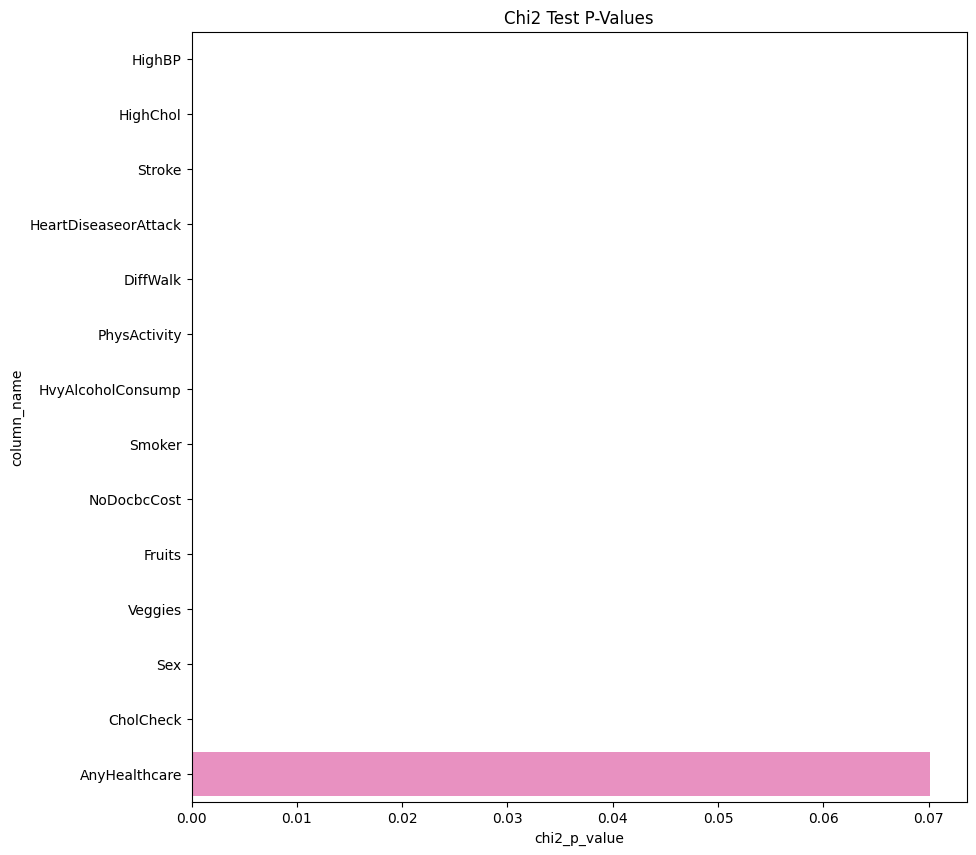

In [202]:
#  plot chi2 test p-values
plt.figure(figsize=(10,10))
sns.barplot(x='chi2_p_value', y='column_name', data=chi2_test_p_values)
plt.title('Chi2 Test P-Values')
plt.show()

#### Record Categorical Variables with Low P-Values in the Chi-Square Test

In [203]:
# record chi2 test p-values more than 0.05 into a list
chi2_test_p_values_more_than_0_05 = chi2_test_p_values[chi2_test_p_values['chi2_p_value'] > 0.05]['column_name'].to_list()
chi2_test_p_values_more_than_0_05

['AnyHealthcare']

### Numerical Variables - ANOVA Test

#### ANOVA Test Code

In [204]:
#  f_classif test on numerical columns
f_classif_test = SelectKBest(score_func=f_classif, k='all')
f_classif_test.fit(diabetes_health_indicators_data[diabetes_health_indicators_data_non_binary_columns], diabetes_health_indicators_data['Diabetes_binary'])

SelectKBest(k='all')

#### ANOVA Test Results

In [205]:
# create dataframe for f_classif test scores
f_classif_test_scores = pd.DataFrame(f_classif_test.scores_, columns=['f_classif_score'])
f_classif_test_scores['column_name'] = diabetes_health_indicators_data_non_binary_columns
# swap column names and chi2 scores
f_classif_test_scores = f_classif_test_scores[['column_name', 'f_classif_score']]
f_classif_test_scores = f_classif_test_scores.sort_values(by='f_classif_score', ascending=False).reset_index(drop=True)
print("F_Classif Test Scores")
display(f_classif_test_scores)

#  create dataframe for f_classif test p-values
f_classif_test_p_values = pd.DataFrame(f_classif_test.pvalues_, columns=['f_classif_p_value'])
f_classif_test_p_values['column_name'] = diabetes_health_indicators_data_non_binary_columns
# swap column names and chi2 scores
f_classif_test_p_values = f_classif_test_p_values[['column_name', 'f_classif_p_value']]
f_classif_test_p_values = f_classif_test_p_values.sort_values(by='f_classif_p_value', ascending=True).reset_index(drop=True)
print("F_Classif Test P-Values")
display(f_classif_test_p_values)

F_Classif Test Scores


,column_name,f_classif_score
0,GenHlth,23924.564885
1,BMI,12516.718642
2,Age,8246.866284
3,PhysHlth,7672.267690
4,Income,7004.370724
5,Education,3991.111142
6,MentHlth,1224.700591


F_Classif Test P-Values


,column_name,f_classif_p_value
0,BMI,0.000000e+00
1,GenHlth,0.000000e+00
2,PhysHlth,0.000000e+00
3,Age,0.000000e+00
4,Education,0.000000e+00
5,Income,0.000000e+00
6,MentHlth,1.143283e-267


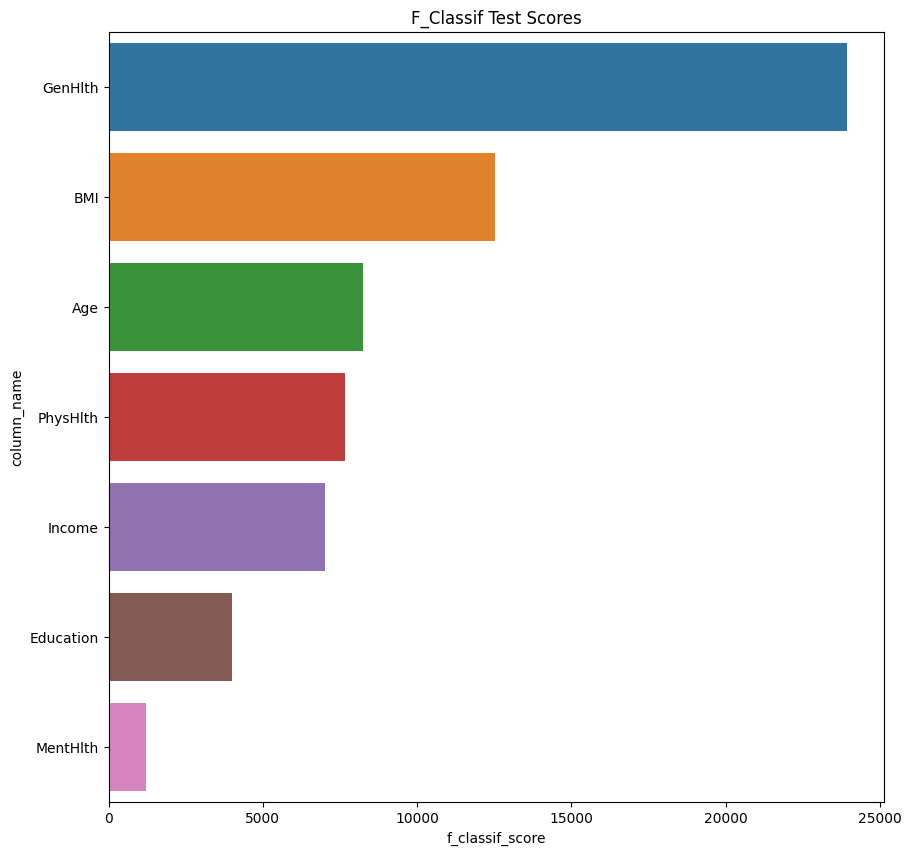

In [206]:
# plot f_classif test scores
plt.figure(figsize=(10,10))
sns.barplot(x='f_classif_score', y='column_name', data=f_classif_test_scores)
plt.title('F_Classif Test Scores')
plt.show()

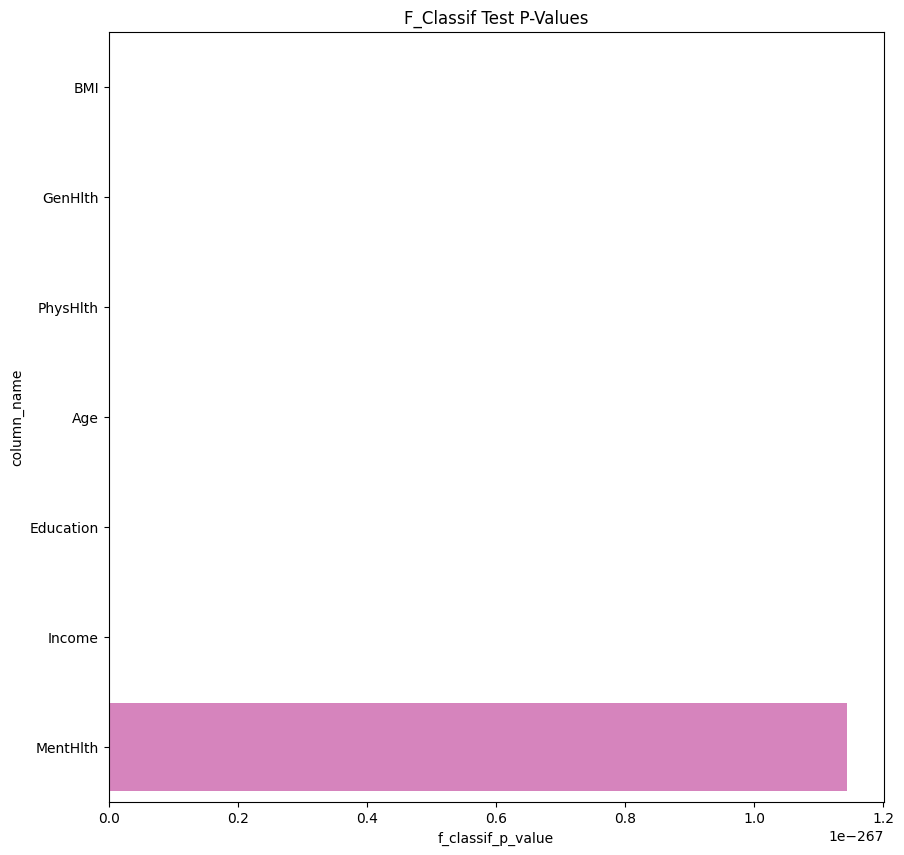

In [207]:
#  plot f_classif test p-values
plt.figure(figsize=(10,10))
sns.barplot(x='f_classif_p_value', y='column_name', data=f_classif_test_p_values)
plt.title('F_Classif Test P-Values')
plt.show()

#### All Nemerical Variables are Significant p-values < 0.05
- Thus, all numeric columns are chosen for the model

### Filter Data out insignificant columns

In [208]:
#  drop columns that are not significant
diabetes_health_indicators_data_after_feature_selection = diabetes_health_indicators_data.drop(chi2_test_p_values_more_than_0_05, axis=1)
diabetes_health_indicators_data_after_feature_selection.shape

(253680, 21)

## EDA on Specific Columns After Filtering

### Categorical Variables

#### HeatMap of Categorical Variables and Target Variable

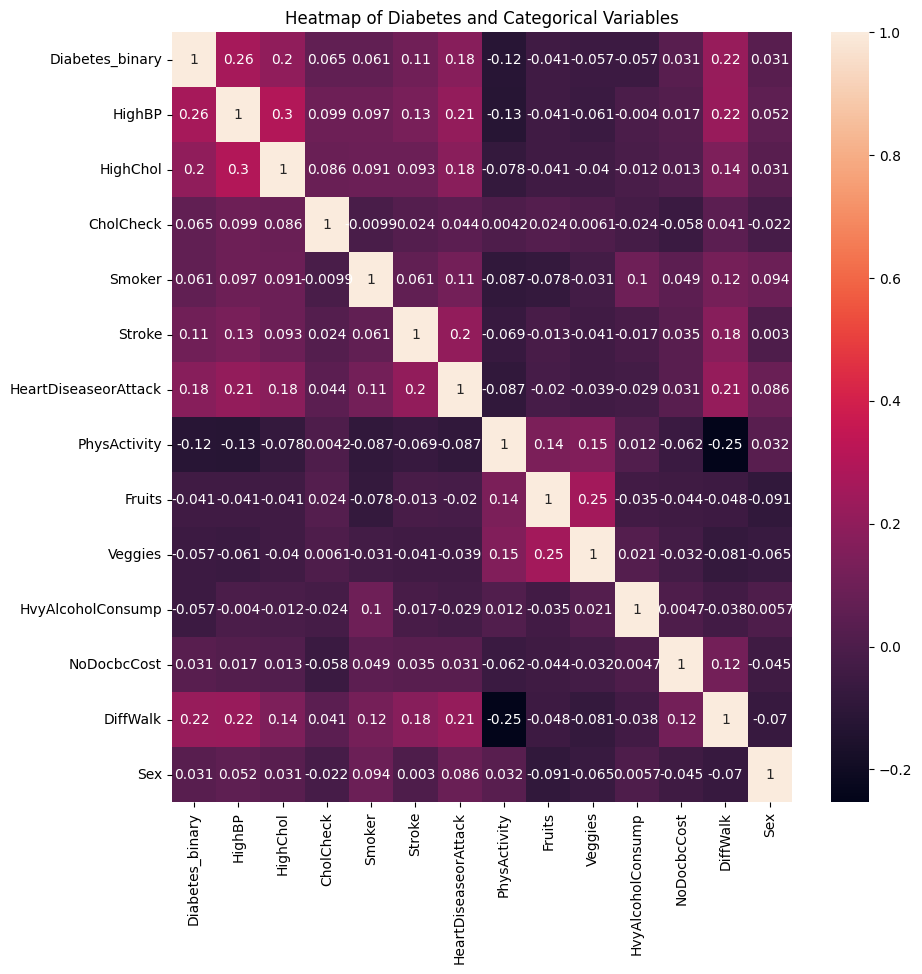

In [226]:
#  remove insignificant columns from categorical variables list
categorical_variables_after_filtering = diabetes_health_indicators_data_binary_columns.copy()
# p/s TIL that you can't combine commands to remove items from a list ._.
# (most likely because .remove is a method or something)
categorical_variables_after_filtering.remove('AnyHealthcare')
create_heat_map(diabetes_health_indicators_data_after_feature_selection[categorical_variables_after_filtering],
                'Heatmap of Diabetes and Categorical Variables')

#### Target Variable - Diabetes_binary

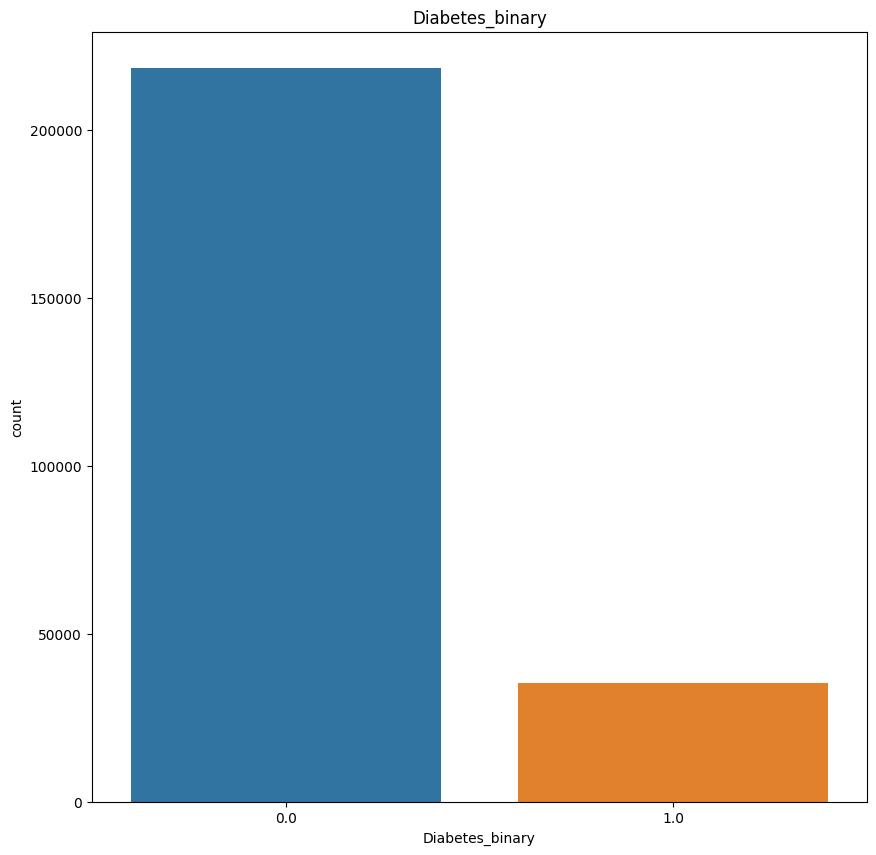

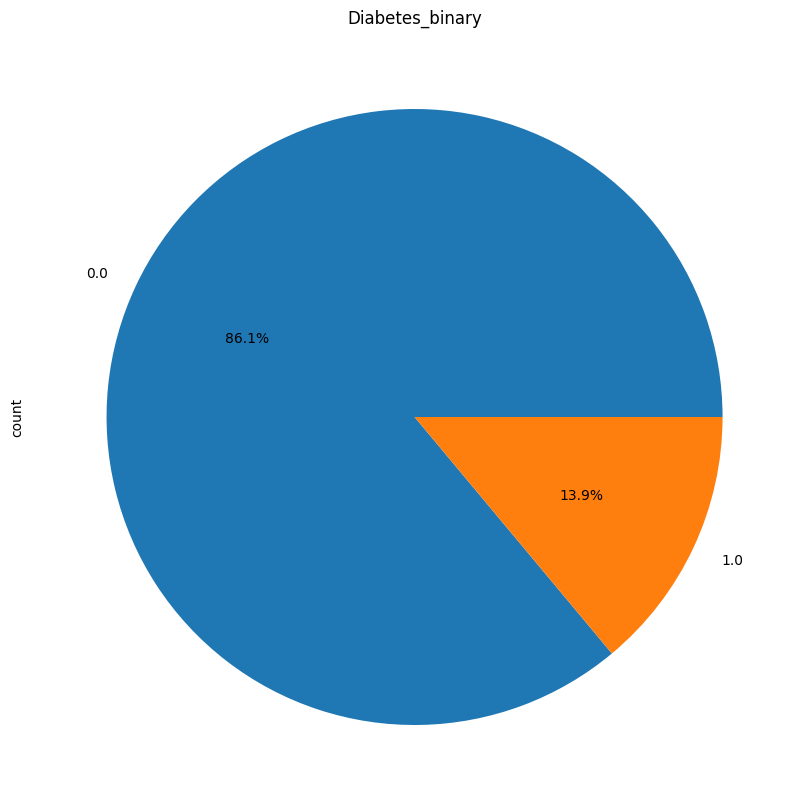

In [210]:
# plot a count plot and a pi chart for diabetes_binary
create_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Diabetes_binary', 'Diabetes_binary')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Diabetes_binary', 'Diabetes_binary')

#### Variable 1 - HighBP

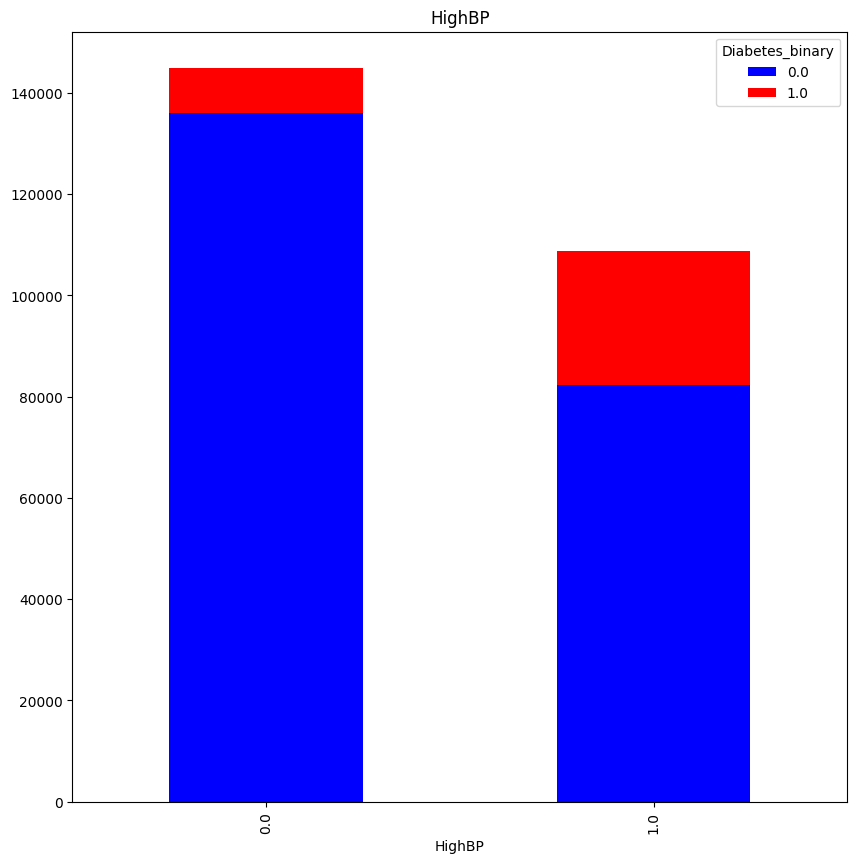

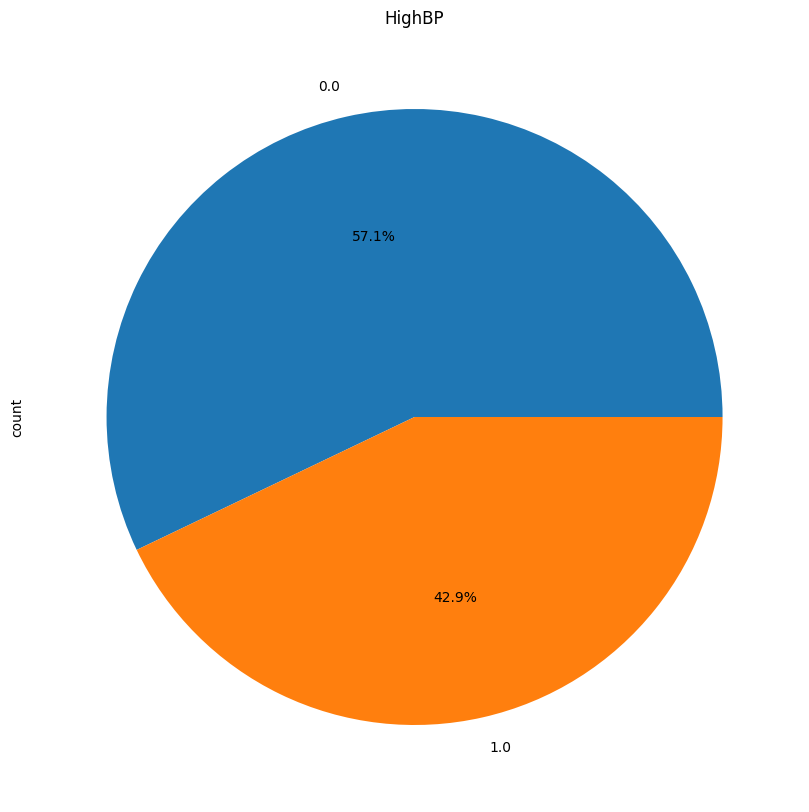

In [211]:
# plot a stacked count plot and a pi chart for HighBP
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HighBP' , 'Diabetes_binary', 'HighBP')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HighBP', 'HighBP')

#### Variable 2 - HighChol

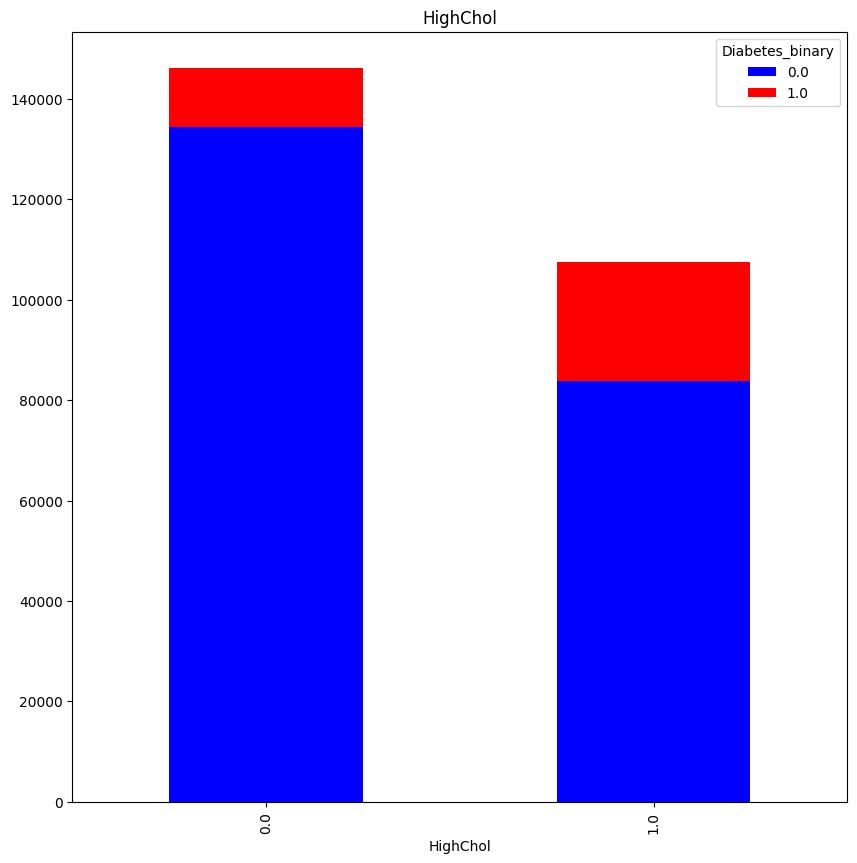

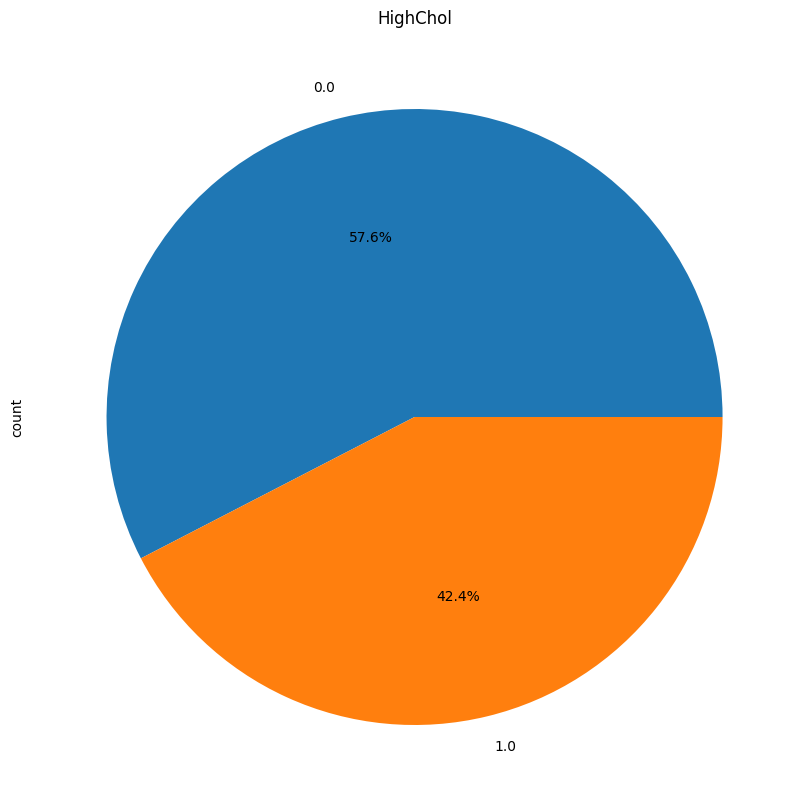

In [212]:
# plot a stacked count plot and a pi chart for HighChol
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HighChol' , 'Diabetes_binary', 'HighChol')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HighChol', 'HighChol')

#### Variable 3 - CholCheck

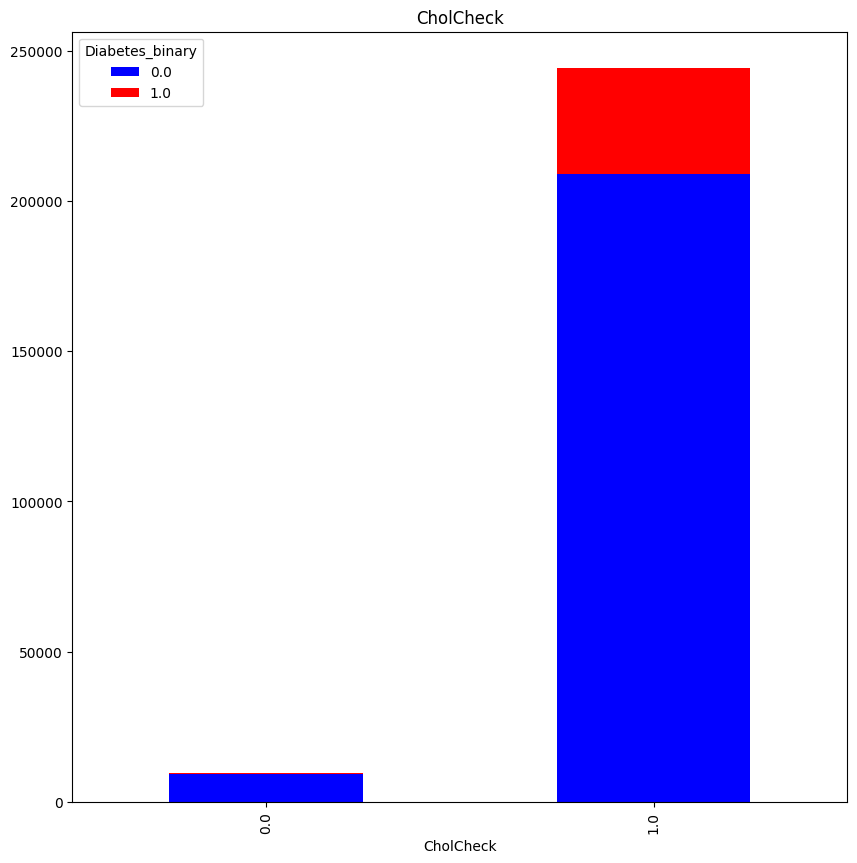

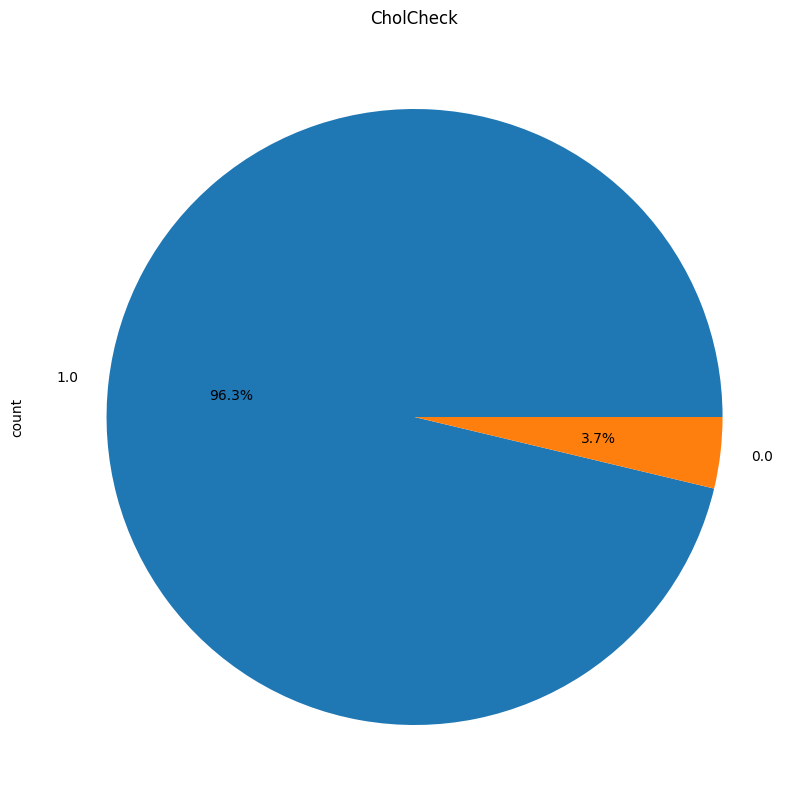

In [213]:
# plot a stacked count plot and a pi chart for CholCheck
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'CholCheck' , 'Diabetes_binary', 'CholCheck')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'CholCheck', 'CholCheck')

#### Variable 4 - Smoker

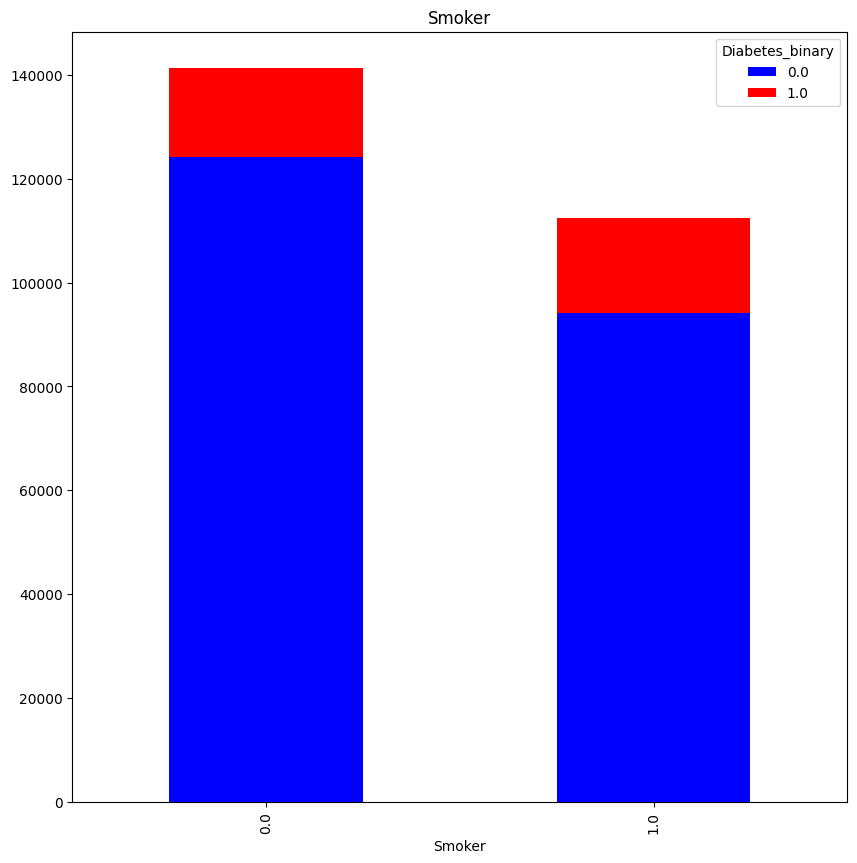

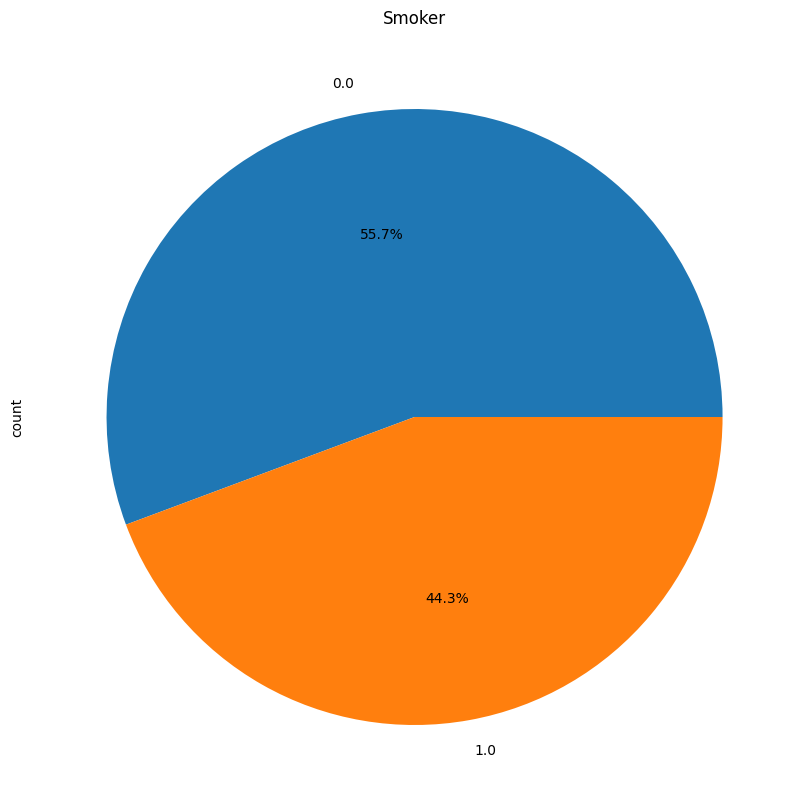

In [214]:
# plot a stacked count plot and a pi chart for Smoker
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Smoker' , 'Diabetes_binary', 'Smoker')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Smoker', 'Smoker')

#### Variable 5 - Stroke

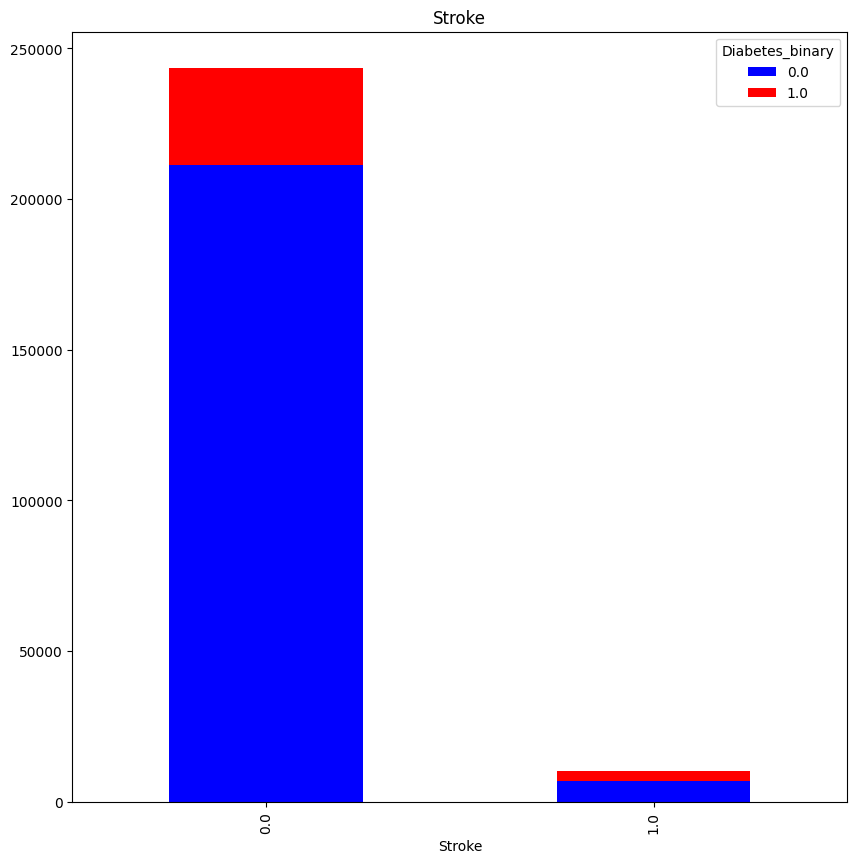

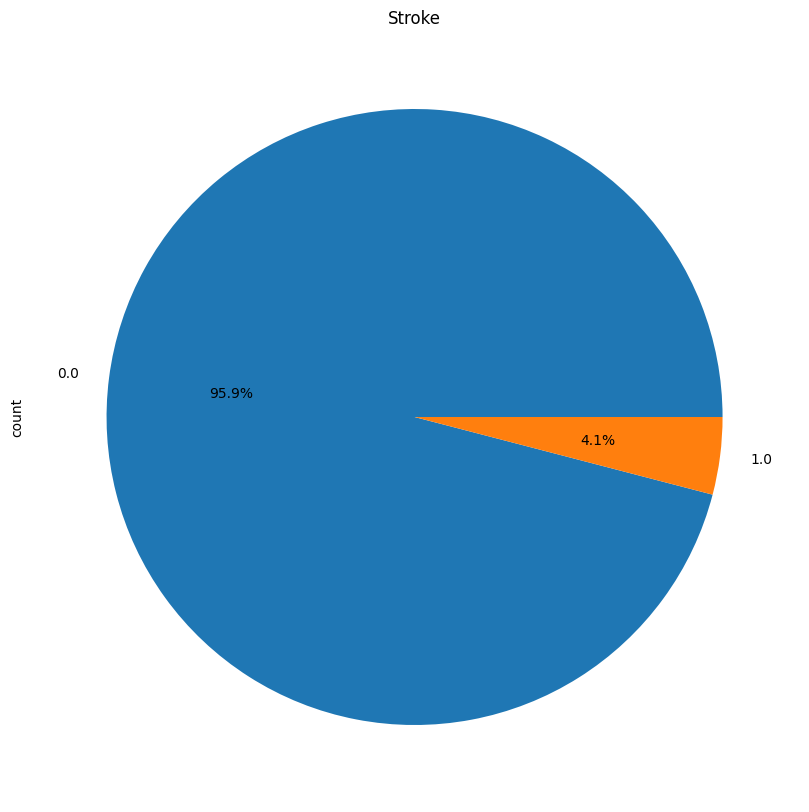

In [215]:
# plot a stacked count plot and a pi chart for Stroke
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Stroke' , 'Diabetes_binary', 'Stroke')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Stroke', 'Stroke')

#### Variable 6 - HeartDiseaseorAttack

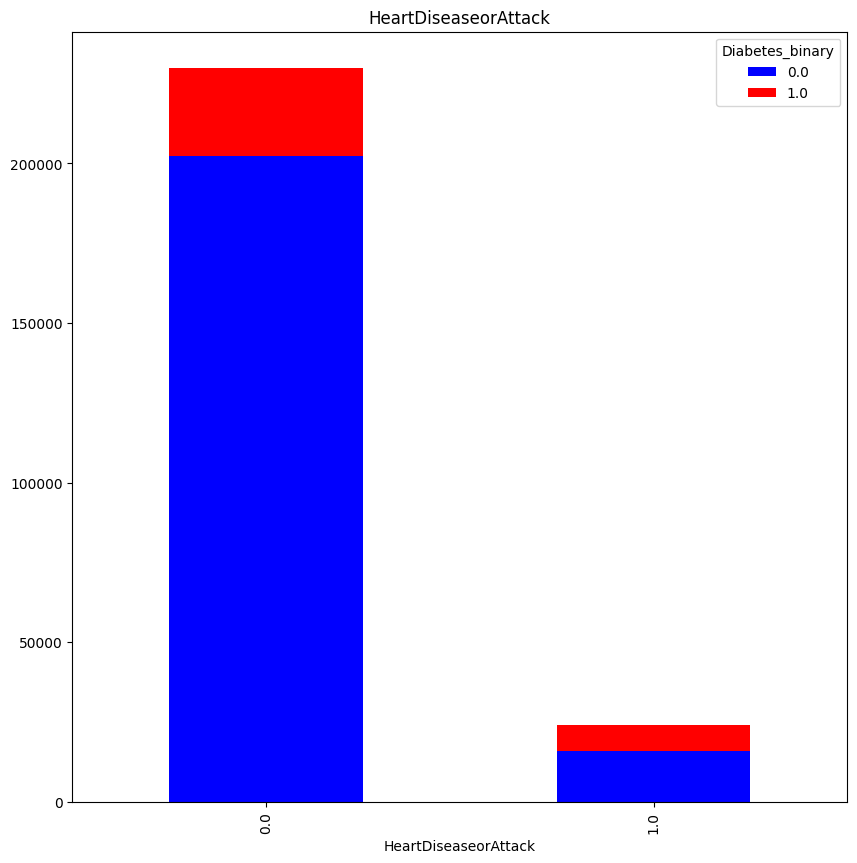

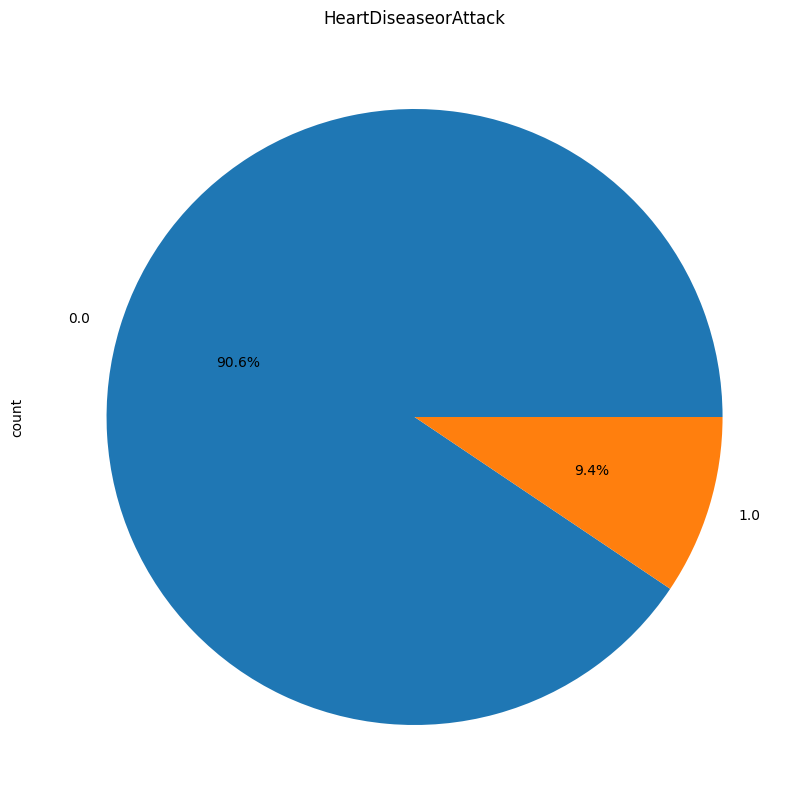

In [216]:
# plot a stacked count plot and a pi chart for HeartDiseaseorAttack
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HeartDiseaseorAttack' , 'Diabetes_binary', 'HeartDiseaseorAttack')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HeartDiseaseorAttack', 'HeartDiseaseorAttack')

#### Variable 7 - PhysActivity

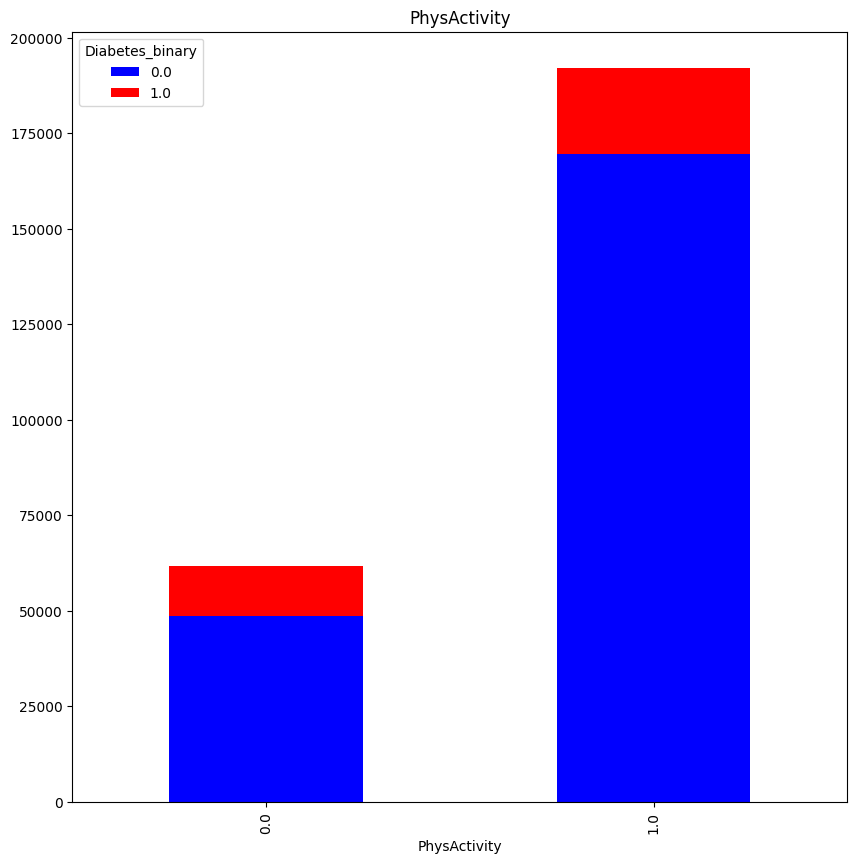

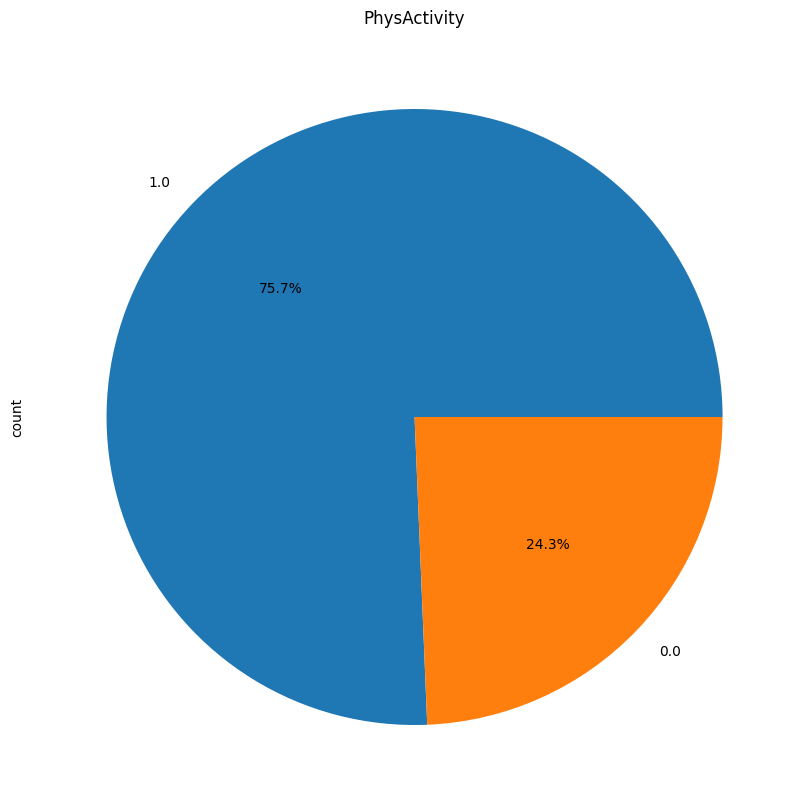

In [217]:
# plot a stacked count plot and a pi chart for PhysActivity
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'PhysActivity' , 'Diabetes_binary', 'PhysActivity')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'PhysActivity', 'PhysActivity')

#### Variable 8 - Fruits

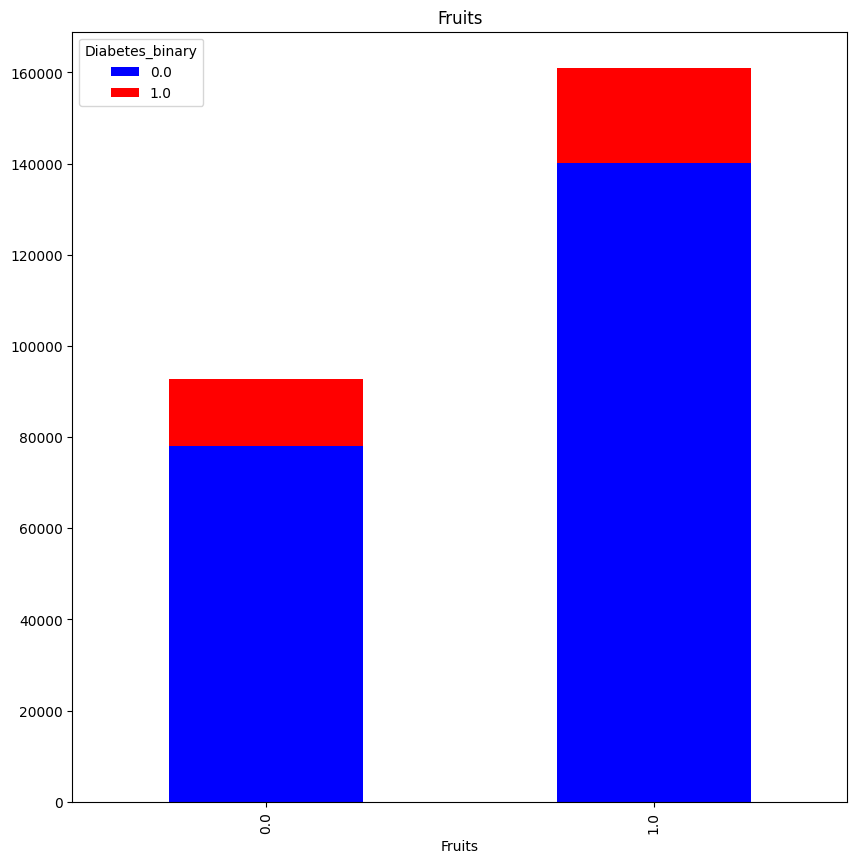

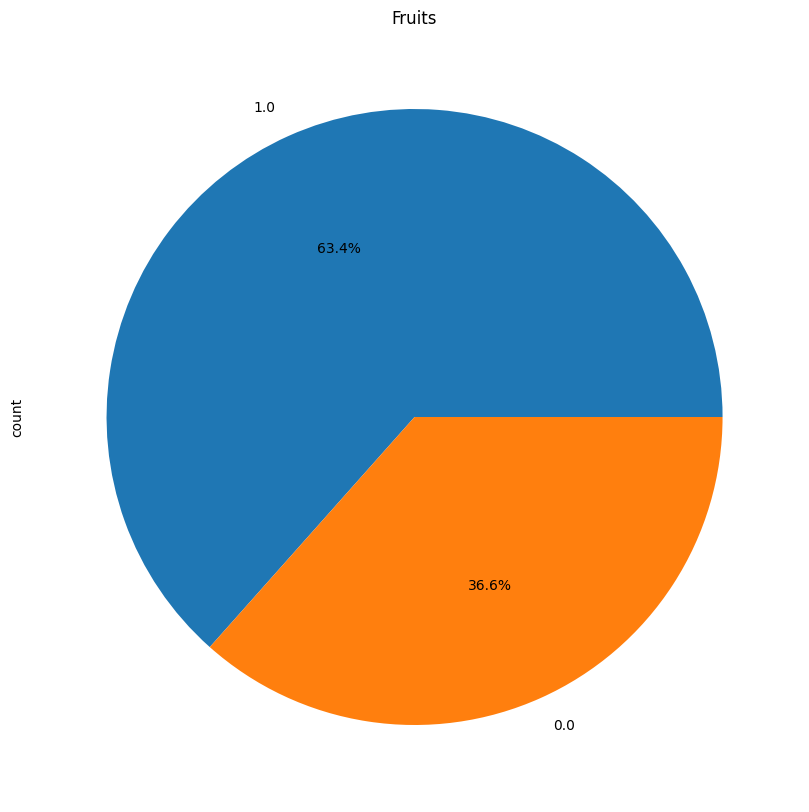

In [218]:
# plot a stacked count plot and a pi chart for Fruits
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Fruits' , 'Diabetes_binary', 'Fruits')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Fruits', 'Fruits')

#### Variable 9 - Veggies

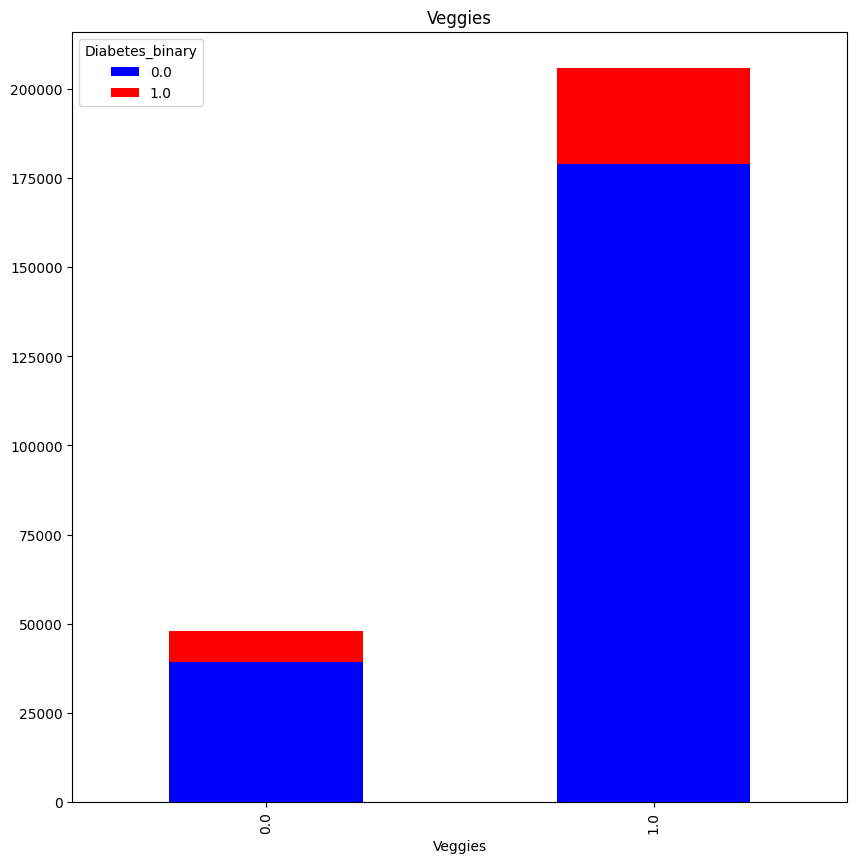

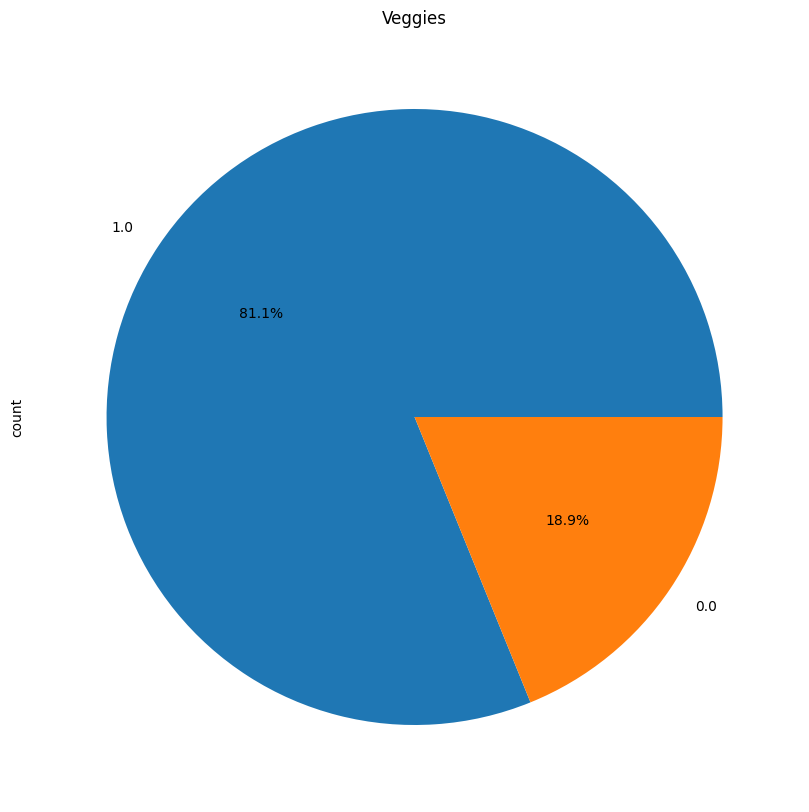

In [219]:
# plot a stacked count plot and a pi chart for Veggies
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Veggies' , 'Diabetes_binary', 'Veggies')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Veggies', 'Veggies')

#### Variable 10 - HvyAlcoholConsump

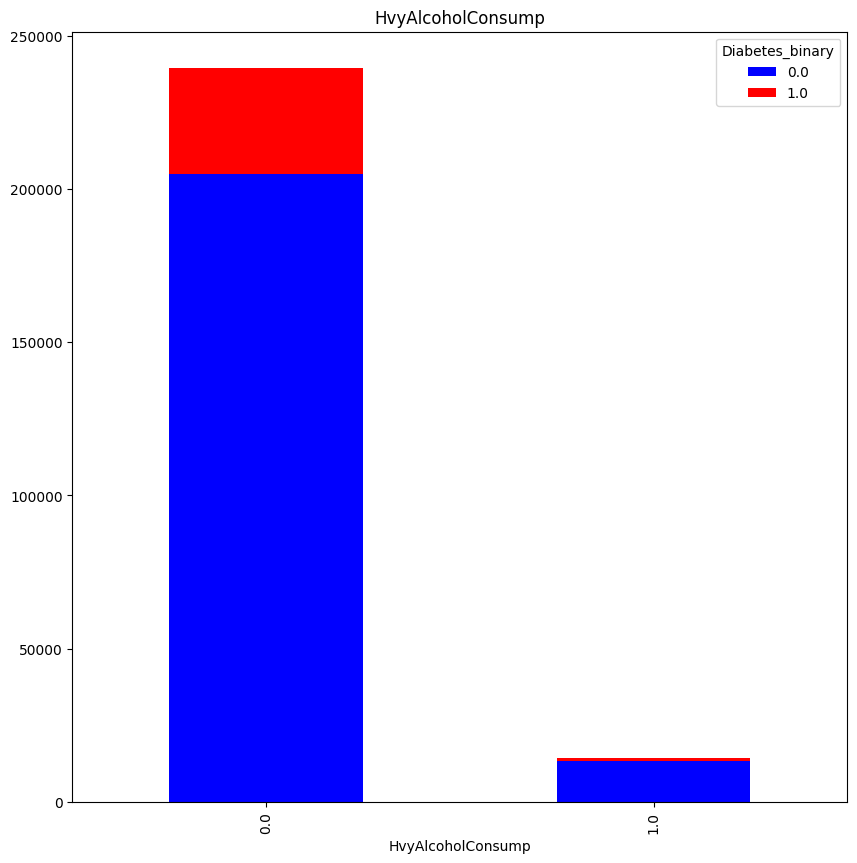

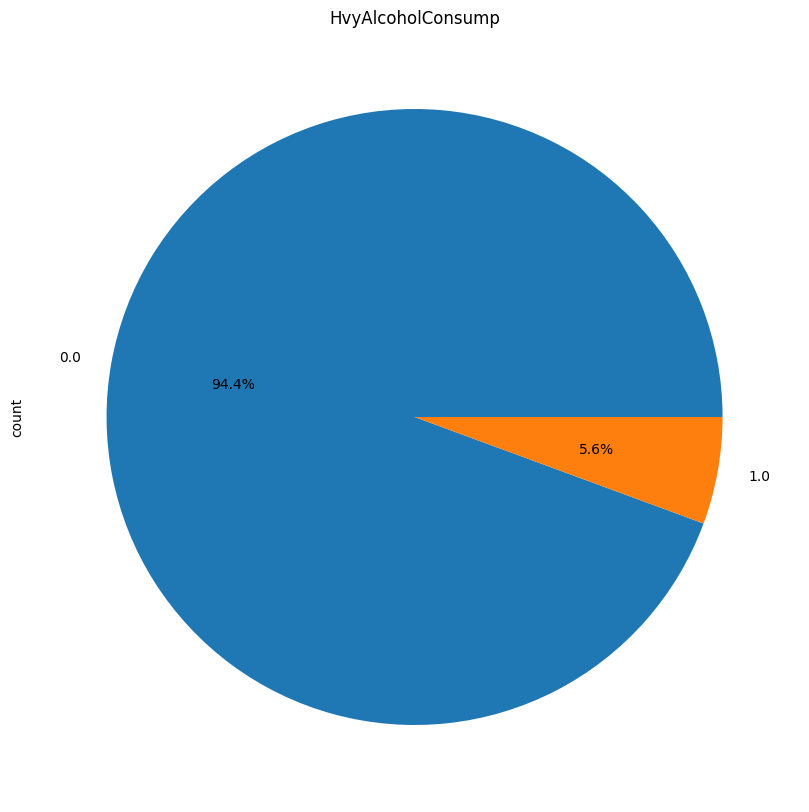

In [220]:
# plot a stacked count plot and a pi chart for HvyAlcoholConsump
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HvyAlcoholConsump' , 'Diabetes_binary', 'HvyAlcoholConsump')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HvyAlcoholConsump', 'HvyAlcoholConsump')

#### Variable 11 - NoDocbcCost

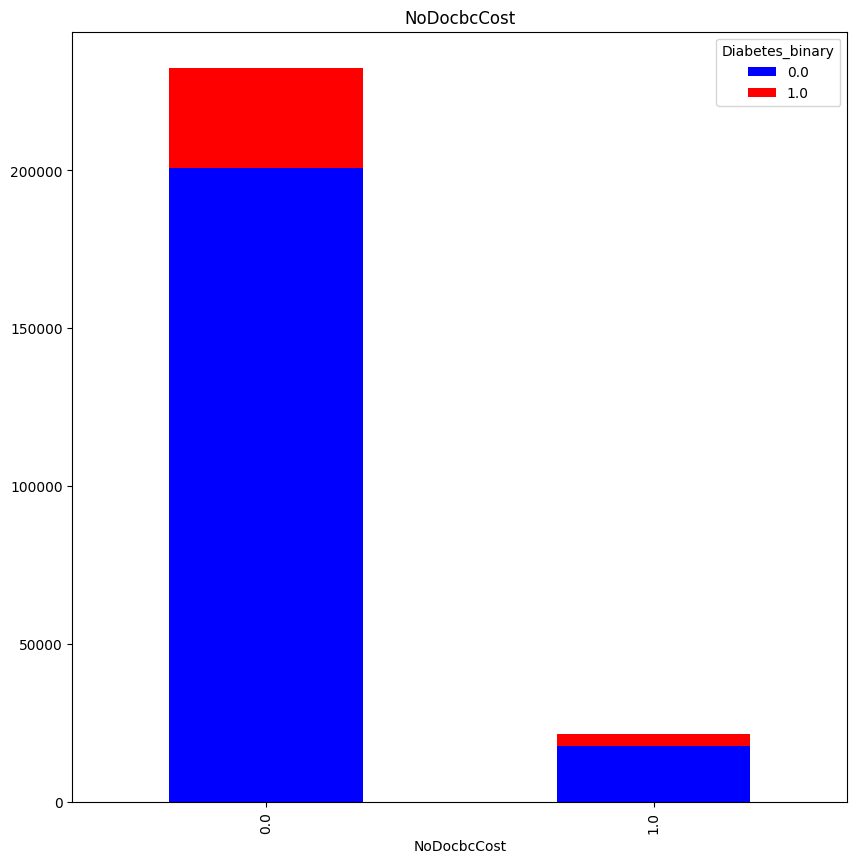

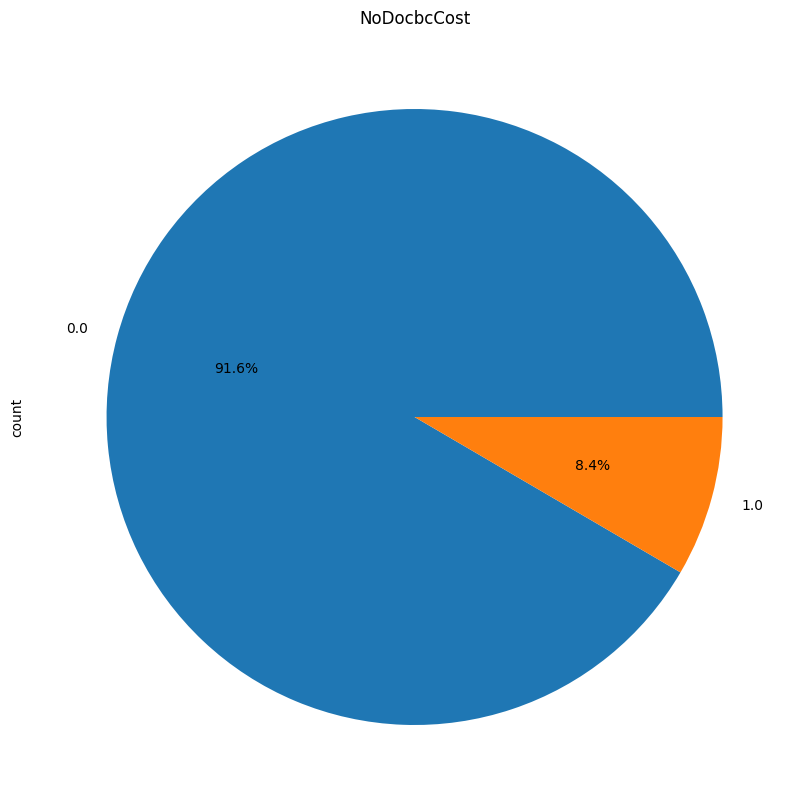

In [221]:
# plot a stacked count plot and a pi chart for NoDocbcCost
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'NoDocbcCost' , 'Diabetes_binary', 'NoDocbcCost')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'NoDocbcCost', 'NoDocbcCost')

#### Variable 12 - DiffWalk

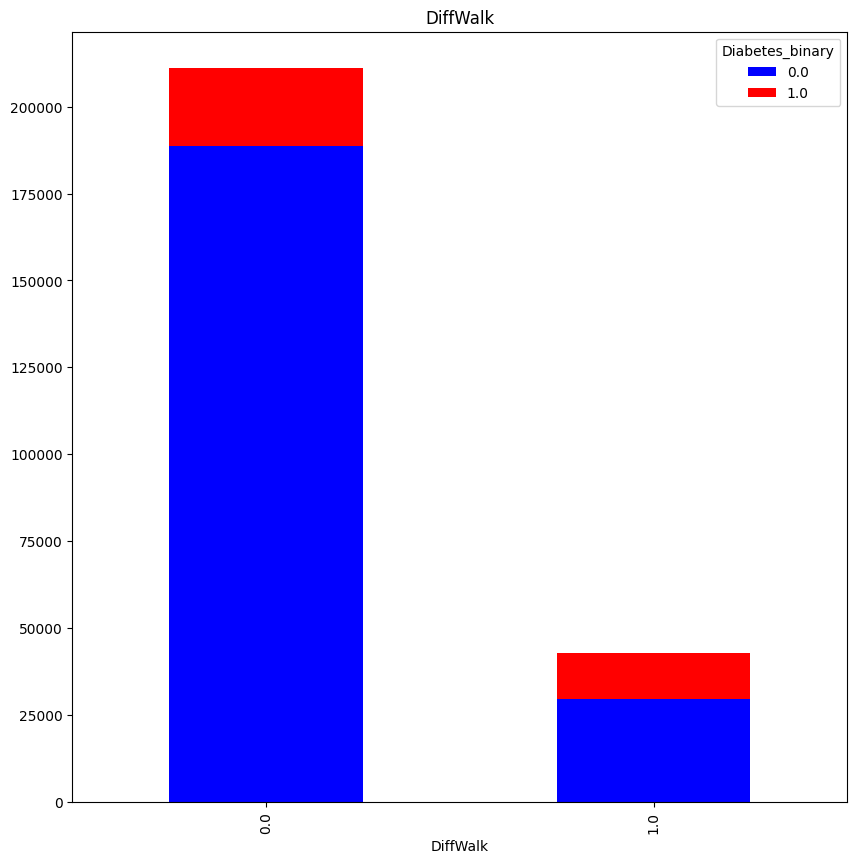

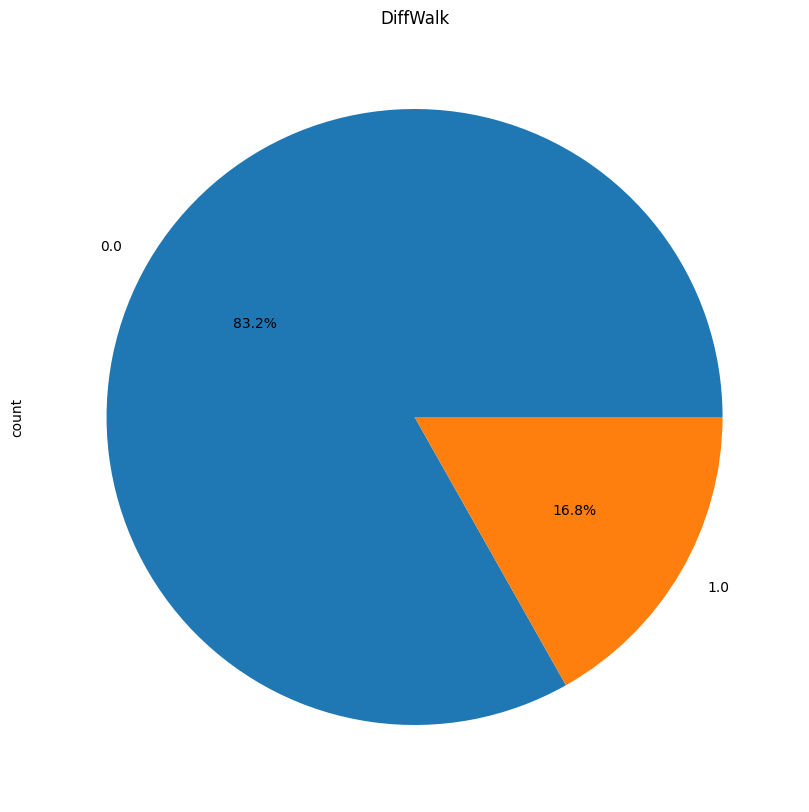

In [222]:
# plot a stacked count plot and a pi chart for DiffWalk
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'DiffWalk' , 'Diabetes_binary', 'DiffWalk')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'DiffWalk', 'DiffWalk')

#### Variable 13 - Sex

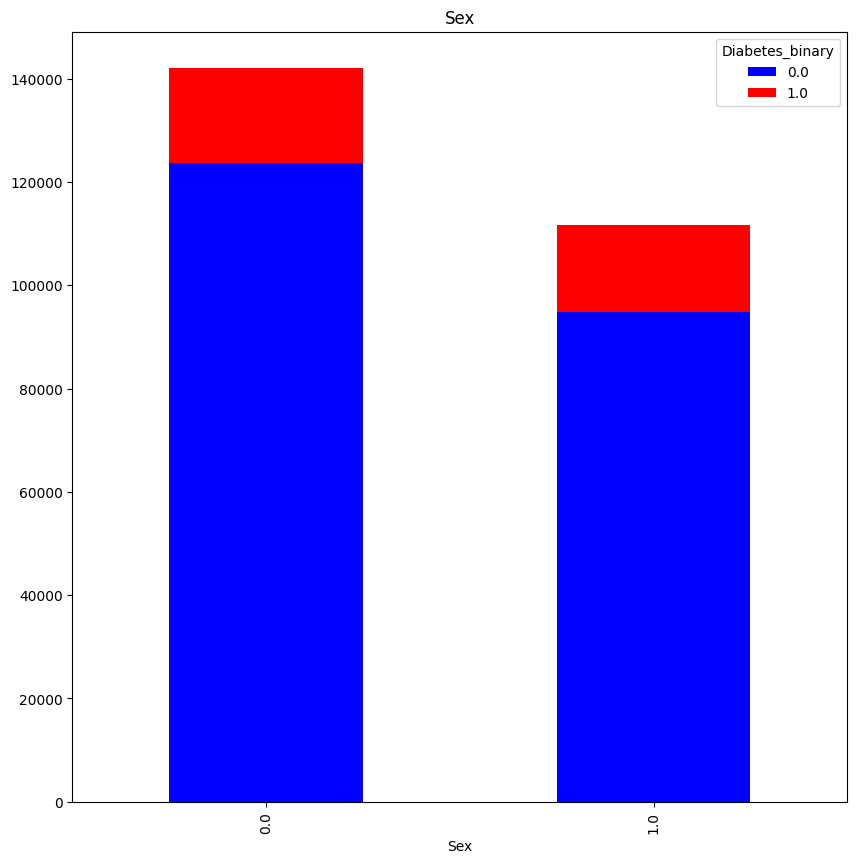

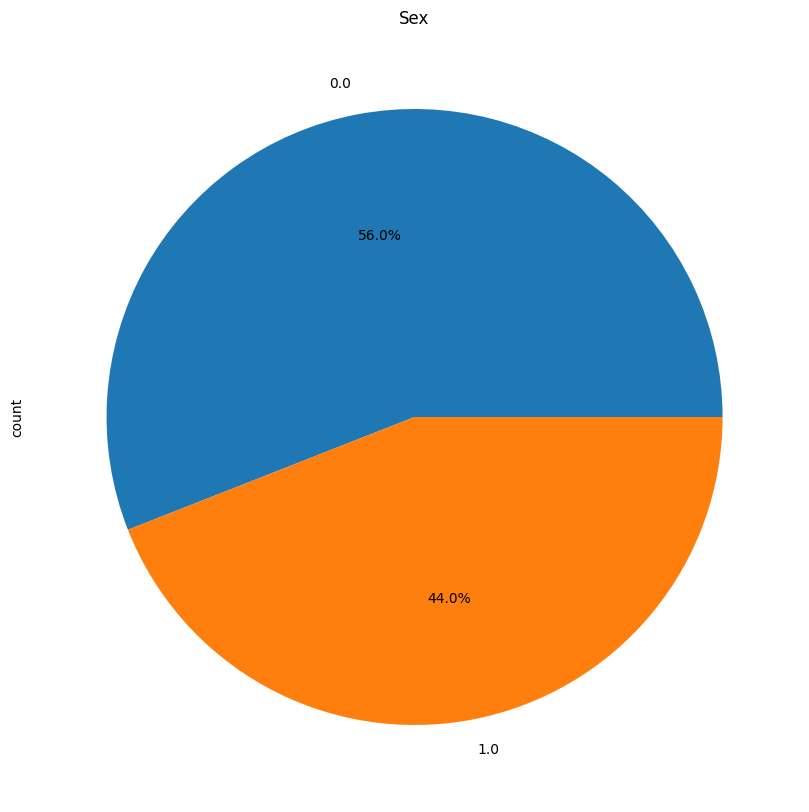

In [223]:
# plot a stacked count plot and a pi chart for Sex
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Sex' , 'Diabetes_binary', 'Sex')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Sex', 'Sex')

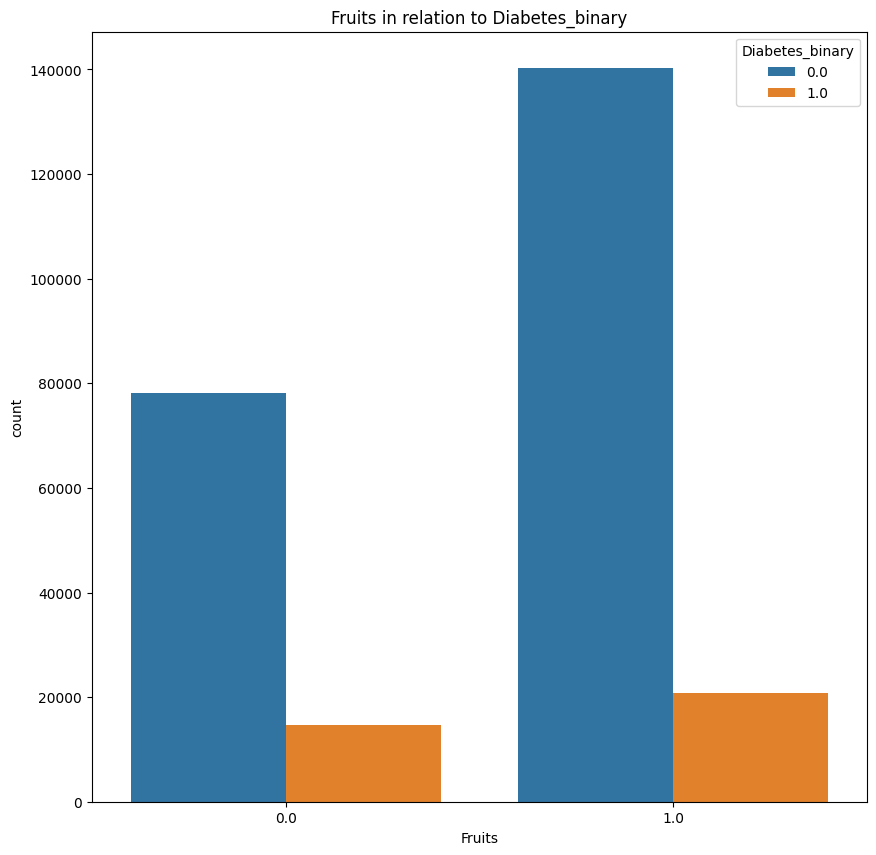

In [224]:
#make a stacked count plot for Fruits in relation to Diabetes_binary
fig = plt.figure(figsize=(10,10))
sns.countplot(x='Fruits', hue='Diabetes_binary', data=diabetes_health_indicators_data_after_feature_selection)
plt.title('Fruits in relation to Diabetes_binary')
plt.show()

### Numerical Variables

#### HeatMap of Numerical Variables and Target Variable

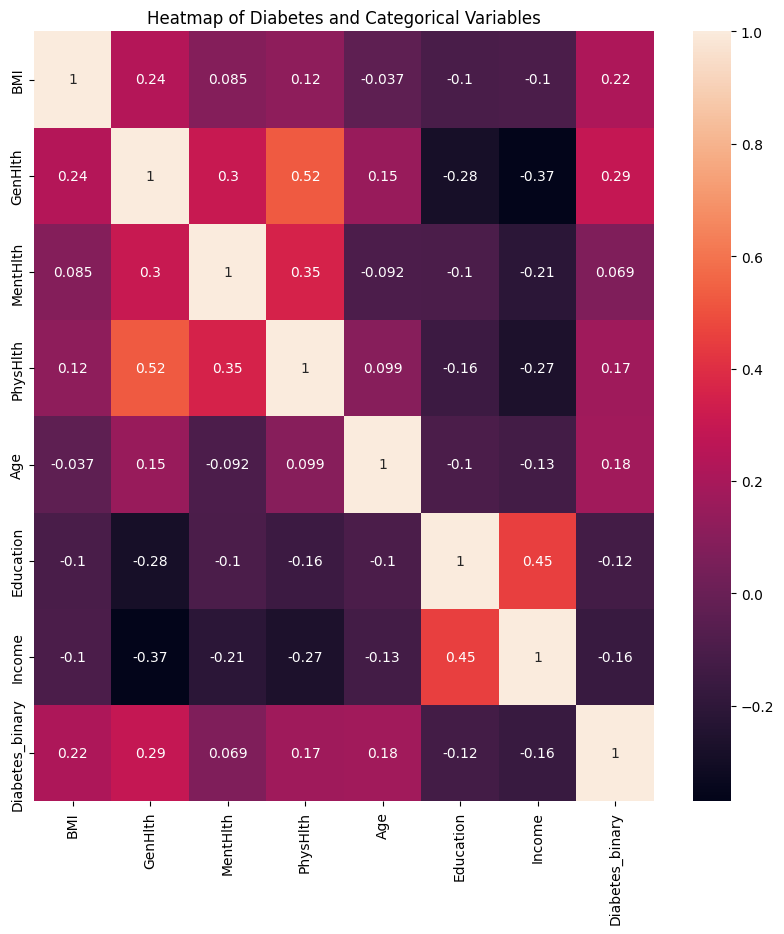

In [229]:
# add diabetic binary into list
numeric_variables_with_target_variable = diabetes_health_indicators_data_non_binary_columns[:]
numeric_variables_with_target_variable.append('Diabetes_binary')
create_heat_map(diabetes_health_indicators_data_after_feature_selection[numeric_variables_with_target_variable],
                'Heatmap of Diabetes and Categorical Variables')

#### Variable 14 - BMI

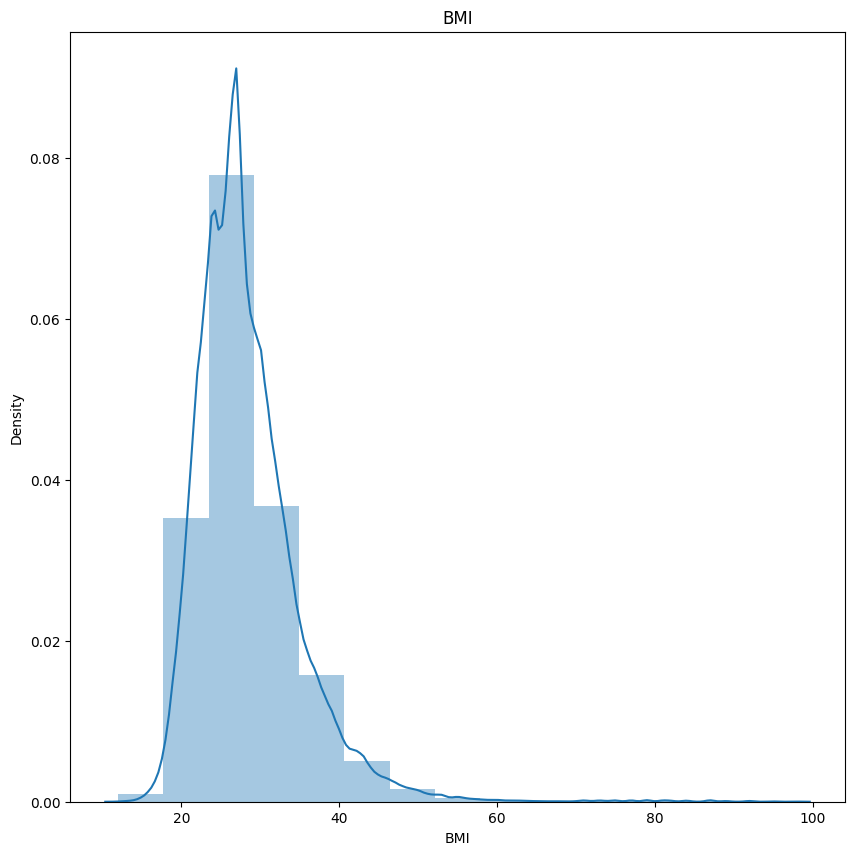

In [243]:
create_histogram(diabetes_health_indicators_data_after_feature_selection, 'BMI', 'BMI',15)

#### Variable 15 - GenHlth

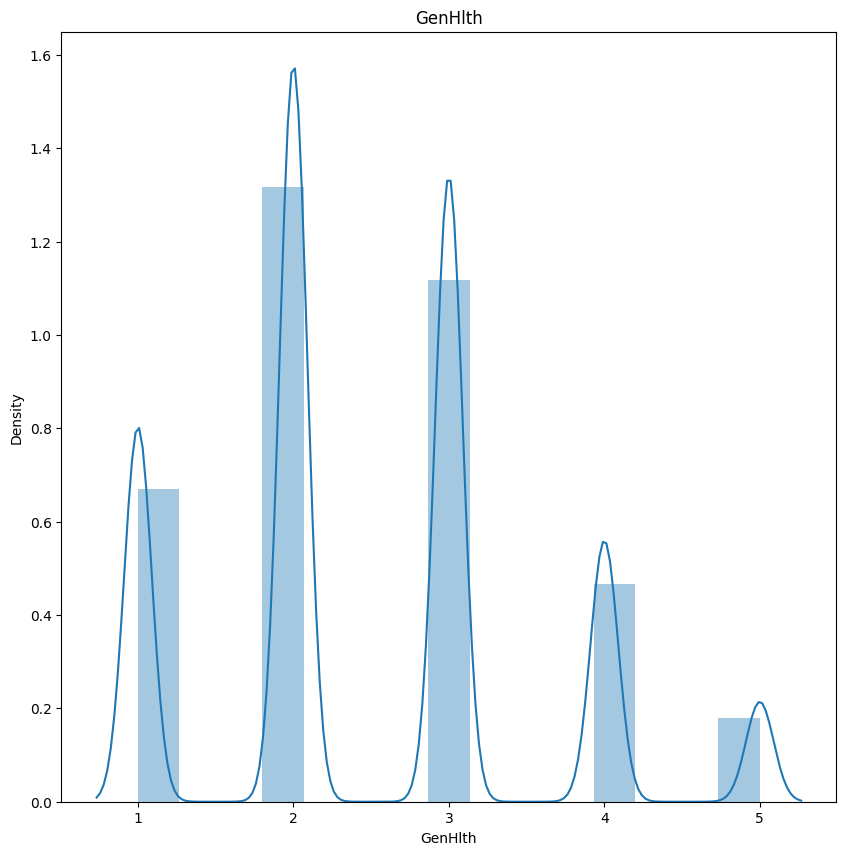

In [244]:
create_histogram(diabetes_health_indicators_data_after_feature_selection, 'GenHlth', 'GenHlth',15)

#### Variable 16 - MentHlth

#### Variable 17 - PhysHlth

#### Variable 18 - Age

#### Variable 19 - Education

#### Variable 20 - Income

# Data Preprocessing